✅ โหลดไฟล์ข้อมูลที่ประมวลผลแล้วสำเร็จ!

--- 🌧️ กำลังสร้างกราฟวิเคราะห์ 'ภัยคุกคาม' (Threat) ตามช่วงเวลา ---


/var/folders/89/hx457xt54dl3cdz1fssyz4tr0000gn/T/ipykernel_48022/3463171254.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_anomalies, x='month', y='avg_rainfall_mm', palette='coolwarm')


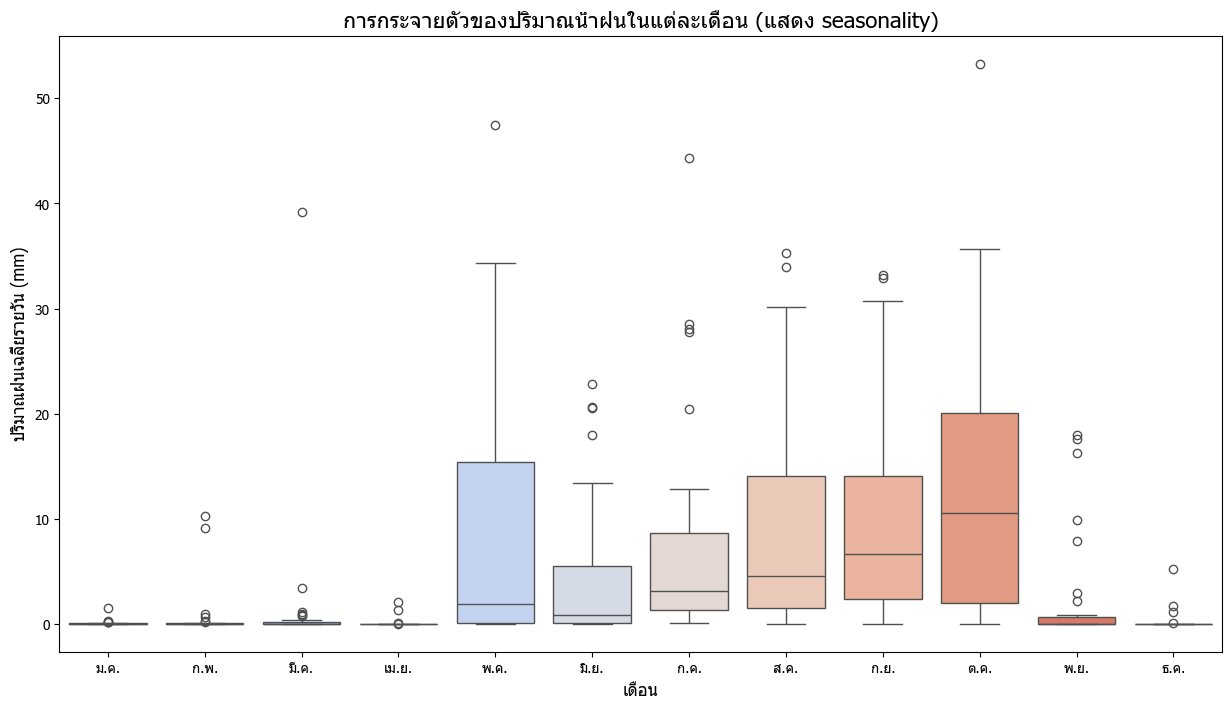

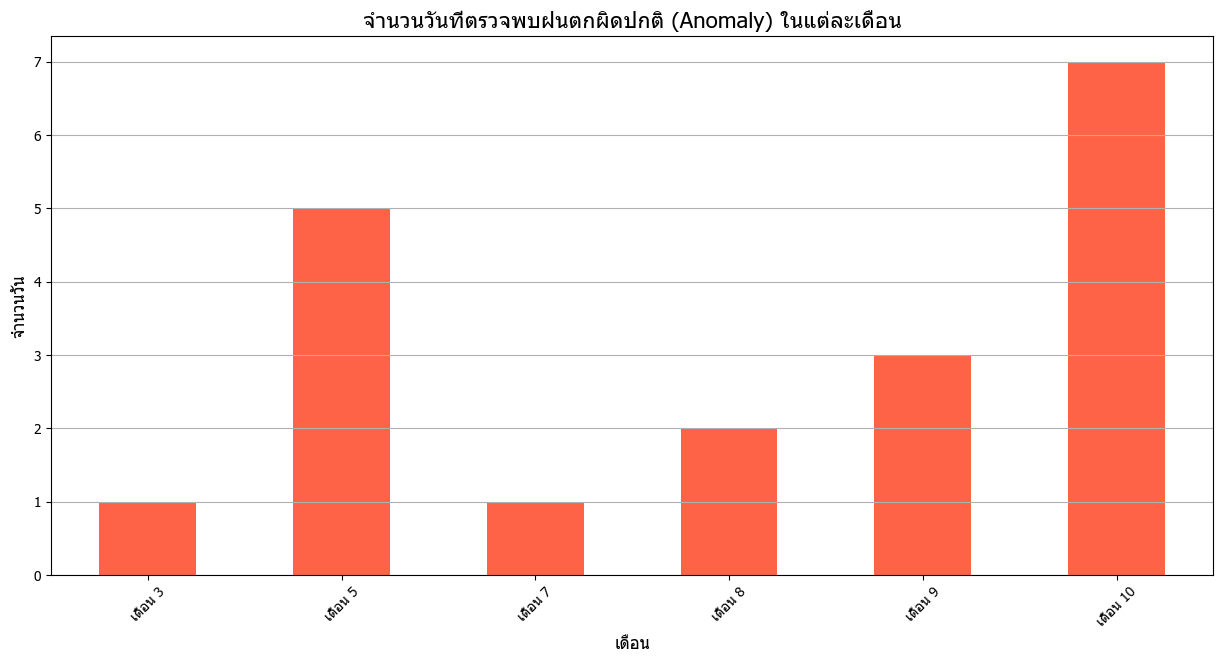


--- 🗺️ กำลังสร้างกราฟวิเคราะห์ 'ความเปราะบาง' (Vulnerability) ของพื้นที่ ---



--- 🔗 กำลังสร้างกราฟเพื่อ 'เชื่อมโยง' สองชุดข้อมูล ---


/var/folders/89/hx457xt54dl3cdz1fssyz4tr0000gn/T/ipykernel_48022/3463171254.py:87: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




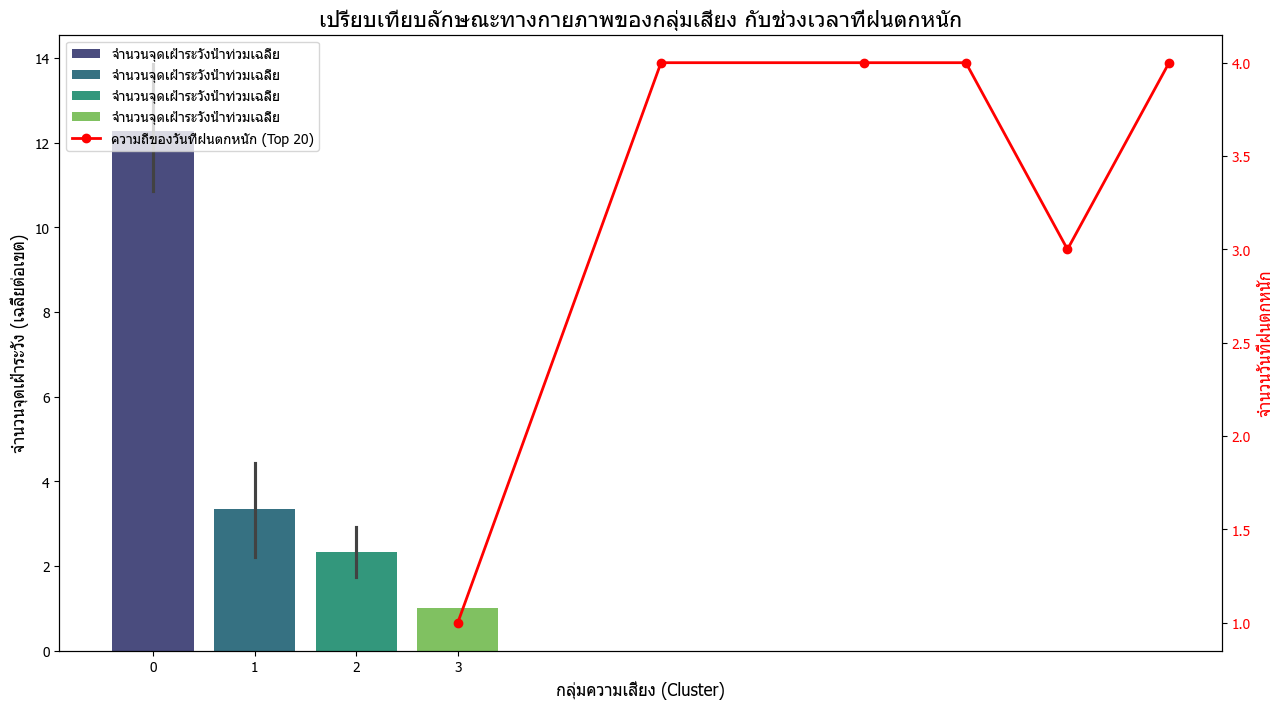

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # เราจะใช้ Plotly สำหรับกราฟ Sunburst ที่สวยงาม
import os

# --- 🎨 1. ตั้งค่าพื้นฐานและฟอนต์ภาษาไทย ---
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Tahoma']

# --- 📂 2. ตั้งค่า Path และโหลดข้อมูล ---
PROCESSED_DIR = '../data/processed'
# ใช้ไฟล์ผลลัพธ์จากการ Clustering และ Anomaly Detection เพราะมีข้อมูลครบถ้วนที่สุด
CLUSTER_FILE = os.path.join(PROCESSED_DIR, 'district_cluster_results.csv')
ANOMALY_FILE = os.path.join(PROCESSED_DIR, 'daily_rainfall_anomaly_results.csv')

try:
    df_clusters = pd.read_csv(CLUSTER_FILE)
    df_anomalies = pd.read_csv(ANOMALY_FILE, parse_dates=['date'])
    print("✅ โหลดไฟล์ข้อมูลที่ประมวลผลแล้วสำเร็จ!")
except FileNotFoundError:
    print("❌ ไม่พบไฟล์ข้อมูล! กรุณารัน Notebook 02 และ 03 ก่อน")
    # exit()

# ==============================================================================
# 🌧️ ส่วนที่ 1: วิเคราะห์ "ภัยคุกคาม" (Threat) ตามช่วงเวลา
# ==============================================================================
print("\n--- 🌧️ กำลังสร้างกราฟวิเคราะห์ 'ภัยคุกคาม' (Threat) ตามช่วงเวลา ---")

# --- กราฟที่ 1: Box Plot ปริมาณน้ำฝนรายเดือน (เพื่อดูฤดูกาล) ---
df_anomalies['month'] = df_anomalies['date'].dt.month
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_anomalies, x='month', y='avg_rainfall_mm', palette='coolwarm')
plt.title('การกระจายตัวของปริมาณน้ำฝนในแต่ละเดือน (แสดง seasonality)', fontsize=16)
plt.xlabel('เดือน', fontsize=12)
plt.ylabel('ปริมาณฝนเฉลี่ยรายวัน (mm)', fontsize=12)
plt.xticks(ticks=range(12), labels=['ม.ค.', 'ก.พ.', 'มี.ค.', 'เม.ย.', 'พ.ค.', 'มิ.ย.', 'ก.ค.', 'ส.ค.', 'ก.ย.', 'ต.ค.', 'พ.ย.', 'ธ.ค.'])
plt.show()

# --- กราฟที่ 2: Bar Chart จำนวนวันที่ฝนตกผิดปกติในแต่ละเดือน ---
anomaly_counts_by_month = df_anomalies[df_anomalies['is_anomaly'] == -1].groupby('month').size()
plt.figure(figsize=(15, 7))
anomaly_counts_by_month.plot(kind='bar', color='tomato')
plt.title('จำนวนวันที่ตรวจพบฝนตกผิดปกติ (Anomaly) ในแต่ละเดือน', fontsize=16)
plt.xlabel('เดือน', fontsize=12)
plt.ylabel('จำนวนวัน', fontsize=12)
plt.xticks(ticks=range(len(anomaly_counts_by_month)), labels=[f'เดือน {i}' for i in anomaly_counts_by_month.index], rotation=45)
plt.grid(axis='y')
plt.show()


# ==============================================================================
# 🗺️ ส่วนที่ 2: วิเคราะห์ "ความเปราะบาง" (Vulnerability) ของพื้นที่
# ==============================================================================
print("\n--- 🗺️ กำลังสร้างกราฟวิเคราะห์ 'ความเปราะบาง' (Vulnerability) ของพื้นที่ ---")

# --- กราฟที่ 3: Sunburst Chart แสดงสัดส่วนและความสัมพันธ์เชิงโครงสร้าง ---
# กราฟนี้จะแสดงว่าในแต่ละกลุ่มความเสี่ยง (วงใน) ประกอบด้วยเขตอะไรบ้าง (วงนอก)
# และขนาดของแต่ละชิ้นจะแทนขนาดพื้นที่ (AREA)
fig = px.sunburst(
    df_clusters,
    path=['Cluster', 'เขต'], # สร้างลำดับชั้นจาก Cluster -> เขต
    values='AREA',
    color='Cluster',
    color_discrete_sequence=px.colors.qualitative.Vivid,
    title='สัดส่วนขนาดพื้นที่ของเขตต่างๆ แบ่งตามกลุ่มความเสี่ยง',
    hover_data=['คะแนนรวม', 'จำนวนจุดเสี่ยง']
)
fig.update_traces(textinfo='label+percent entry')
fig.show()


# ==============================================================================
# 🔗 ส่วนที่ 3: "เชื่อมโยง" ความสัมพันธ์ระหว่าง Threat และ Vulnerability
# ==============================================================================
print("\n--- 🔗 กำลังสร้างกราฟเพื่อ 'เชื่อมโยง' สองชุดข้อมูล ---")

# --- กราฟที่ 4: Bar Chart เปรียบเทียบลักษณะของกลุ่มเสี่ยง กับ "จำนวนวันที่ฝนตกหนัก" ---
# แนวคิด: เราจะดูว่ากลุ่มเขตที่มีความเสี่ยงสูง มีลักษณะทางกายภาพที่สอดคล้องกับ "วันที่ฝนตกหนัก" หรือไม่

# 1. หาวันที่ฝนตกหนักที่สุด 20 วันแรกของปี
top_20_rainy_days = df_anomalies.nlargest(20, 'avg_rainfall_mm')

# 2. สร้างกราฟ
fig, ax = plt.subplots(figsize=(15, 8))
# พล็อตค่าเฉลี่ยของ "จำนวนจุดเฝ้าระวังฯ" ของแต่ละกลุ่ม
sns.barplot(data=df_clusters, x='Cluster', y='จำนวนจุดเฝ้าระวังน้ำท่วม', 
            palette='viridis', ax=ax, label='จำนวนจุดเฝ้าระวังน้ำท่วมเฉลี่ย')

ax.set_title('เปรียบเทียบลักษณะทางกายภาพของกลุ่มเสี่ยง กับช่วงเวลาที่ฝนตกหนัก', fontsize=16)
ax.set_ylabel('จำนวนจุดเฝ้าระวัง (เฉลี่ยต่อเขต)', fontsize=12)
ax.set_xlabel('กลุ่มความเสี่ยง (Cluster)', fontsize=12)

# 3. เพิ่มข้อมูลเวลา (Threat) เข้าไปในกราฟ
ax2 = ax.twinx()
# พล็อต "จำนวนวันที่ฝนตกหนัก" ที่เกิดขึ้นในแต่ละเดือน
top_20_rainy_days['month'].value_counts().sort_index().plot(
    kind='line', ax=ax2, color='red', marker='o', 
    linewidth=2, label='ความถี่ของวันที่ฝนตกหนัก (Top 20)'
)
ax2.set_ylabel('จำนวนวันที่ฝนตกหนัก', fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='red')

# รวม legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

✅ โหลดไฟล์ข้อมูลที่ประมวลผลแล้วสำเร็จ!

--- 🔬 กำลังสร้าง Heatmap วิเคราะห์ความสัมพันธ์ของข้อมูลความเสี่ยง ---


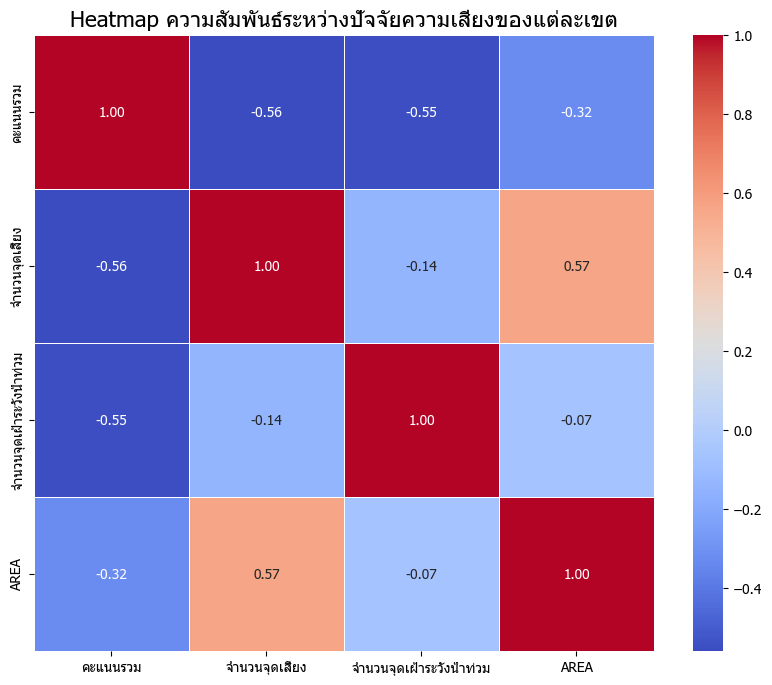


--- 🌧️ กำลังสร้าง Line Chart วิเคราะห์ภาพรวมปริมาณน้ำฝน ---


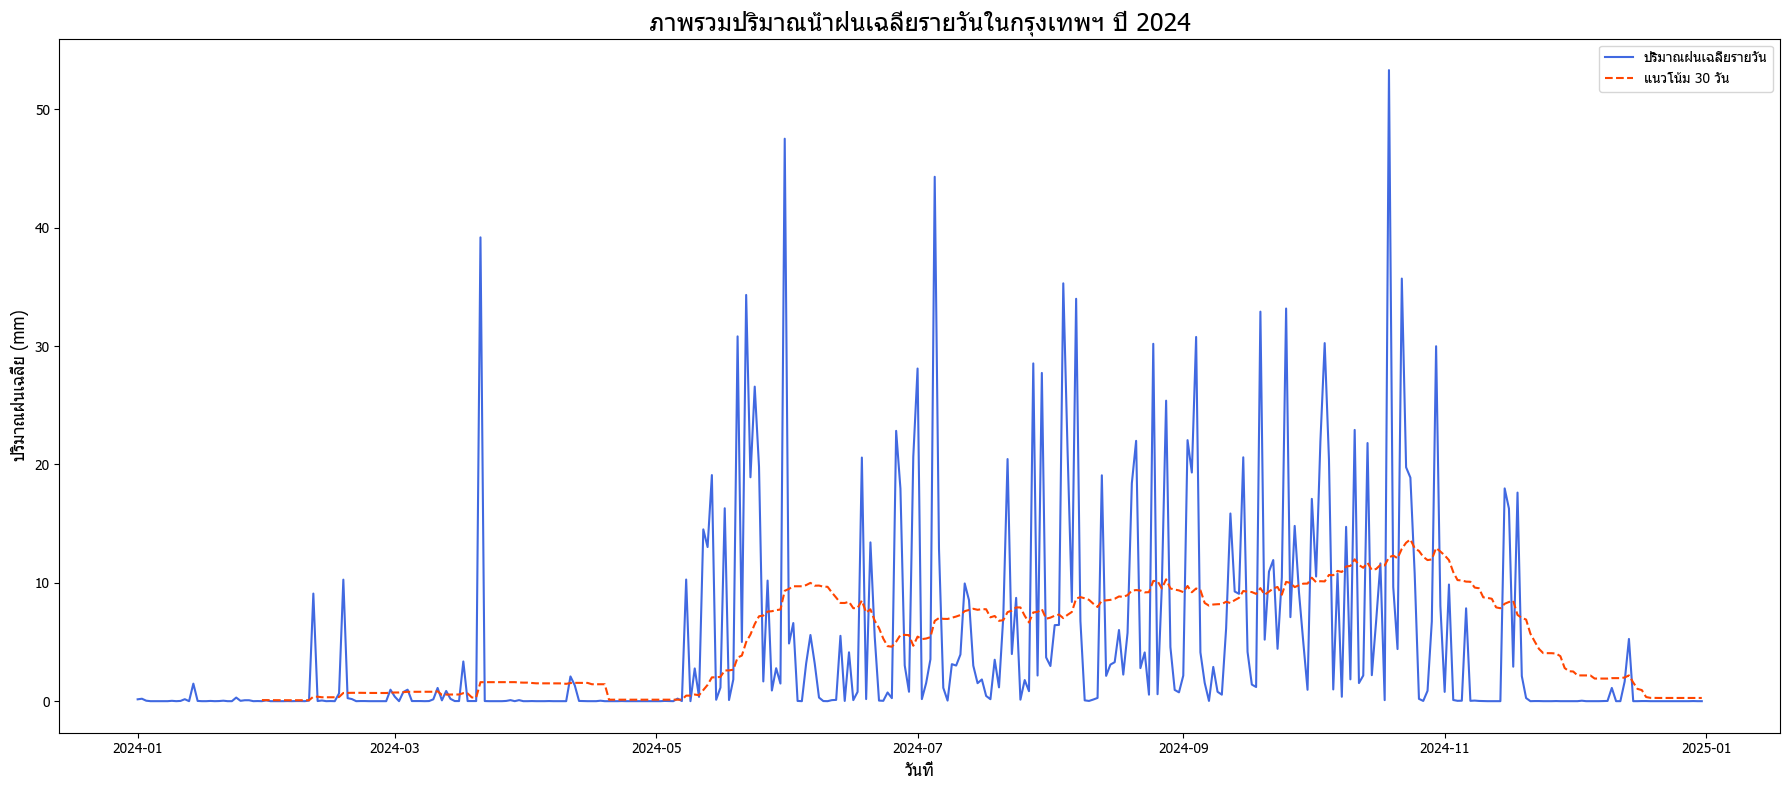


--- 🤔 การวิเคราะห์ความสัมพันธ์ระหว่าง 'ปริมาณน้ำฝน' และ 'ความเสี่ยง' ---

การวิเคราะห์ความสัมพันธ์ระหว่างสองข้อมูลนี้ ไม่สามารถทำเป็นกราฟเดียวตรงๆ ได้ 
เพราะ 'ข้อมูลความเสี่ยง' เป็นข้อมูลคงที่ (Static) ของแต่ละเขต 
ในขณะที่ 'ข้อมูลน้ำฝน' เป็นข้อมูลอนุกรมเวลา (Time-Series) ของแต่ละวัน

แต่วิธีที่ดีที่สุดในการดูความเกี่ยวข้องคือการใช้ "กราฟซ้อน" (Dual-Axis Plot) 
โดยเราจะพล็อต 'ปริมาณฝน' คู่ไปกับ 'จำนวนเขตที่มีความเสี่ยงสูงที่อาจได้รับผลกระทบ'



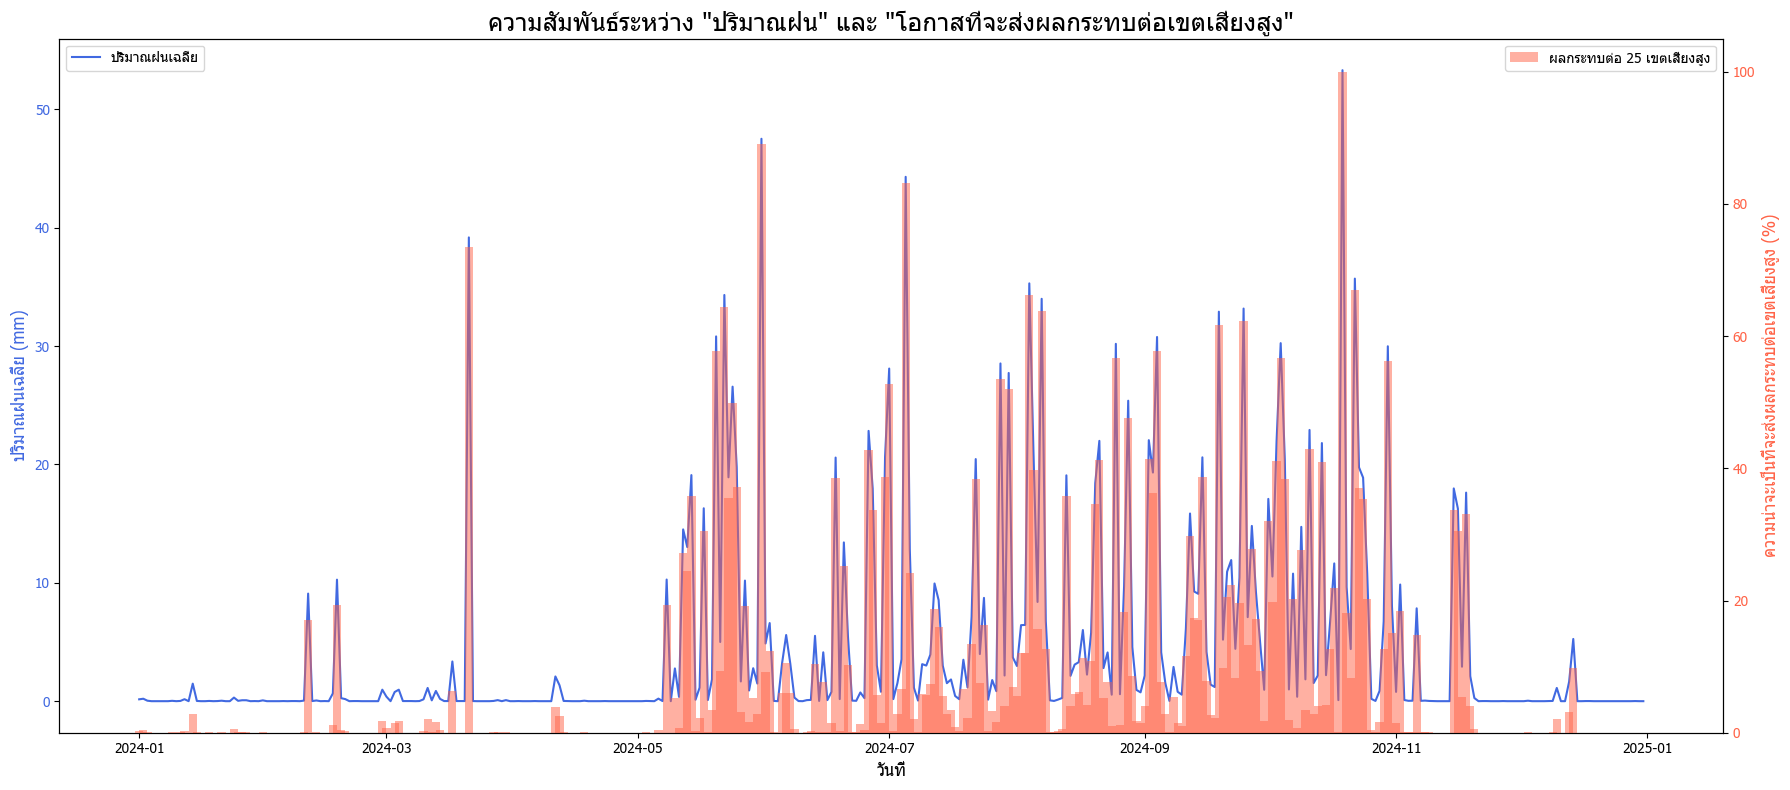

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# --- 🎨 1. ตั้งค่าพื้นฐานและฟอนต์ภาษาไทย ---
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Tahoma']

# --- 📂 2. ตั้งค่า Path และโหลดข้อมูล ---
PROCESSED_DIR = '../data/processed'
RISK_FILE = os.path.join(PROCESSED_DIR, 'district_risk_profile_processed.csv')
RAIN_FILE = os.path.join(PROCESSED_DIR, 'daily_rainfall_2024_processed.csv')

try:
    df_risk = pd.read_csv(RISK_FILE)
    df_rain = pd.read_csv(RAIN_FILE, parse_dates=['date'])
    print("✅ โหลดไฟล์ข้อมูลที่ประมวลผลแล้วสำเร็จ!")
except FileNotFoundError:
    print("❌ ไม่พบไฟล์ข้อมูล! กรุณารันสคริปต์เตรียมข้อมูลก่อน")
    # exit() # หากรันเป็น .py ให้ uncomment

# ==============================================================================
# 📈 ส่วนที่ 1: วิเคราะห์ความสัมพันธ์ของ "ข้อมูลความเสี่ยง"
# ==============================================================================
print("\n--- 🔬 กำลังสร้าง Heatmap วิเคราะห์ความสัมพันธ์ของข้อมูลความเสี่ยง ---")

# --- กราฟที่ 1: Heatmap แสดงความสัมพันธ์ระหว่างปัจจัยความเสี่ยง ---
# เลือกเฉพาะคอลัมน์ที่เป็นตัวเลขและเกี่ยวข้องกับความเสี่ยง
risk_features = ['คะแนนรวม', 'จำนวนจุดเสี่ยง', 'จำนวนจุดเฝ้าระวังน้ำท่วม', 'AREA']
correlation_matrix = df_risk[risk_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True,        # แสดงตัวเลขค่าความสัมพันธ์ในช่อง
    cmap='coolwarm',   # ใช้โทนสีฟ้า-แดง (ฟ้า=ไม่เกี่ยว, แดง=เกี่ยวข้องกัน)
    linewidths=.5,
    fmt='.2f'          # แสดงทศนิยม 2 ตำแหน่ง
)
plt.title('Heatmap ความสัมพันธ์ระหว่างปัจจัยความเสี่ยงของแต่ละเขต', fontsize=16)
plt.show()


# ==============================================================================
# 🌧️ ส่วนที่ 2: วิเคราะห์การกระจายตัวของ "ข้อมูลปริมาณน้ำฝน"
# ==============================================================================
print("\n--- 🌧️ กำลังสร้าง Line Chart วิเคราะห์ภาพรวมปริมาณน้ำฝน ---")

# --- กราฟที่ 2: Line Chart แสดงปริมาณน้ำฝนตลอดทั้งปี ---
plt.figure(figsize=(18, 8))
plt.plot(df_rain['date'], df_rain['avg_rainfall_mm'], color='royalblue', label='ปริมาณฝนเฉลี่ยรายวัน')

# เพิ่มเส้นค่าเฉลี่ยเคลื่อนที่ 30 วัน เพื่อให้เห็นแนวโน้มได้ง่ายขึ้น
df_rain['rainfall_ma_30'] = df_rain['avg_rainfall_mm'].rolling(window=30).mean()
plt.plot(df_rain['date'], df_rain['rainfall_ma_30'], color='orangered', linestyle='--', label='แนวโน้ม 30 วัน')

plt.title('ภาพรวมปริมาณน้ำฝนเฉลี่ยรายวันในกรุงเทพฯ ปี 2024', fontsize=18)
plt.xlabel('วันที่', fontsize=12)
plt.ylabel('ปริมาณฝนเฉลี่ย (mm)', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()


# ==============================================================================
# 🤔 ส่วนที่ 3: ตอบคำถาม "ปริมาณน้ำฝน" เกี่ยวข้องกับ "ความเสี่ยง" หรือไม่?
# ==============================================================================
print("\n--- 🤔 การวิเคราะห์ความสัมพันธ์ระหว่าง 'ปริมาณน้ำฝน' และ 'ความเสี่ยง' ---")
print("""
การวิเคราะห์ความสัมพันธ์ระหว่างสองข้อมูลนี้ ไม่สามารถทำเป็นกราฟเดียวตรงๆ ได้ 
เพราะ 'ข้อมูลความเสี่ยง' เป็นข้อมูลคงที่ (Static) ของแต่ละเขต 
ในขณะที่ 'ข้อมูลน้ำฝน' เป็นข้อมูลอนุกรมเวลา (Time-Series) ของแต่ละวัน

แต่วิธีที่ดีที่สุดในการดูความเกี่ยวข้องคือการใช้ "กราฟซ้อน" (Dual-Axis Plot) 
โดยเราจะพล็อต 'ปริมาณฝน' คู่ไปกับ 'จำนวนเขตที่มีความเสี่ยงสูงที่อาจได้รับผลกระทบ'
""")

# --- กราฟที่ 3: กราฟผสม (Line + Bar) เพื่อดูผลกระทบ ---

# สมมติว่า "เขตเสี่ยงสูง" คือเขตที่มี 'คะแนนรวม' สูงกว่าค่าเฉลี่ย
high_risk_threshold = df_risk['คะแนนรวม'].mean()
num_high_risk_districts = len(df_risk[df_risk['คะแนนรวม'] > high_risk_threshold])

# สร้างข้อมูลจำลอง "ระดับความน่าจะเป็นของผลกระทบ" โดยให้แปรผันตามปริมาณฝน
# (นี่เป็นเพียงการจำลองเพื่อแสดงแนวคิด ไม่ใช่ผลลัพธ์จากโมเดลจริง)
df_rain['impact_probability'] = (df_rain['avg_rainfall_mm'] / df_rain['avg_rainfall_mm'].max()) * 100

fig, ax1 = plt.subplots(figsize=(18, 8))

# แกนที่ 1 (ซ้าย): ปริมาณน้ำฝน (Line Chart)
color = 'royalblue'
ax1.set_xlabel('วันที่', fontsize=12)
ax1.set_ylabel('ปริมาณฝนเฉลี่ย (mm)', fontsize=12, color=color)
ax1.plot(df_rain['date'], df_rain['avg_rainfall_mm'], color=color, label='ปริมาณฝนเฉลี่ย')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

# แกนที่ 2 (ขวา): ระดับผลกระทบ (Bar Chart)
ax2 = ax1.twinx()
color = 'tomato'
ax2.set_ylabel('ความน่าจะเป็นที่จะส่งผลกระทบต่อเขตเสี่ยงสูง (%)', fontsize=12, color=color)
ax2.bar(df_rain['date'], df_rain['impact_probability'], color=color, alpha=0.5, width=2.0, label=f'ผลกระทบต่อ {num_high_risk_districts} เขตเสี่ยงสูง')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

plt.title('ความสัมพันธ์ระหว่าง "ปริมาณฝน" และ "โอกาสที่จะส่งผลกระทบต่อเขตเสี่ยงสูง"', fontsize=18)
fig.tight_layout()
plt.show()

In [2]:
# (โค้ดนี้รันใน Cell ใหม่)
# เราจะโหลดไฟล์ Engineered ล่าสุดที่เราเพิ่งบันทึกไป

# --- 1. โหลดไฟล์ Engineered ล่าสุด ---
print("--- 1. Loading FINAL Engineered DataFrame ---")
path_base = "../data/PROCESSED/"
engineered_df_path = path_base + "master_features_engineered.csv"

try:
    df_final = pd.read_csv(engineered_df_path)
    print(f"Successfully loaded: {engineered_df_path}")
except Exception as e:
    print(f"Error loading file: {e}")

# --- 2. EDA (Histograms) - ตรวจสอบ Feature ใหม่ (โดยเฉพาะ Rain) ---
print("\n--- 2. EDA (Histograms) on Final Features ---")

# เลือก features สำคัญที่จะ plot (เน้นตัวใหม่ๆ ที่เราสร้าง)
features_to_plot = [
    'population', 'canal_count', 'คะแนนรวม', 'AREA',
    'rain_max_24h', 'rain_sum_24h', 'rain_days_heavy', 'rain_days_total',
    'population_density', 'canal_density', 'pump_readiness_ratio'
]

# กรองเอาเฉพาะคอลัมน์ที่มีอยู่ใน df_final
features_to_plot = [col for col in features_to_plot if col in df_final.columns]

plt.figure(figsize=(16, 12))
for i, col in enumerate(features_to_plot):
    plt.subplot(4, 3, i + 1)
    sns.histplot(df_final[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel('')
    plt.ylabel('')

plt.suptitle('Histograms of Key Engineered Features', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# (Optional) บันทึกรูป
# plt.savefig('../reports/figures/02_histograms_final_engineered.png')
print("Histograms generated.")
plt.show()

# --- 3. EDA (Correlation Heatmap) - เพื่อ Feature Selection ---
print("\n--- 3. EDA (Correlation Heatmap) for Feature Selection ---")

# a) เตรียมข้อมูลสำหรับ Correlation
numeric_df = df_final.select_dtypes(include=[np.number])

# b) ลบคอลัมน์ ID หรือคอลัมน์ที่ไม่ใช่ Feature ออก
cols_to_drop = ['OBJECTID', 'dcode', 'pcode', 'budget_year', 'inspec_period']
for col in cols_to_drop:
    if col in numeric_df.columns:
        numeric_df = numeric_df.drop(col, axis=1)

# c) [สำคัญ] ลบคอลัมน์ที่ซ้ำกัน (จาก Snippet ที่คุณส่งมา ผมเห็นว่า group_* มันซ้ำ)
# .loc[:,~] เป็นวิธีที่ปลอดภัยในการเลือกลบคอลัมน์ที่ชื่อซ้ำกัน
numeric_df = numeric_df.loc[:,~numeric_df.columns.duplicated()]
print("Dropped duplicate columns (if any).")

# d) สร้าง Correlation Matrix
corr_matrix = numeric_df.corr()

# e) วาด Heatmap
plt.figure(figsize=(28, 24)) # ใช้ขนาดใหญ่เพราะ Feature เราเยอะ
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', annot_kws={"size": 6})
plt.title('Correlation Matrix of All Final Features (for Selection)')
plt.tight_layout()
# (Optional) บันทึกรูป
# plt.savefig('../reports/figures/03_correlation_heatmap_final.png')
print("Correlation heatmap generated.")
plt.show()

# f) ค้นหาคู่ที่มี Correlation สูง (>= 0.9) เพื่อช่วยในการตัดสินใจ
print("\n--- Highly Correlated Pairs (Correlation >= 0.9) ---")

corr_stacked = corr_matrix.abs().stack().reset_index()
corr_stacked.columns = ['Feature 1', 'Feature 2', 'Correlation']

# กรองเอาเฉพาะคู่ที่ > 0.9 และไม่ใช่ตัวมันเอง
high_corr = corr_stacked[
    (corr_stacked['Correlation'] >= 0.9) & 
    (corr_stacked['Feature 1'] != corr_stacked['Feature 2'])
]

# จัดการคู่ซ้ำ (A-B กับ B-A)
high_corr['pair_key'] = high_corr.apply(lambda row: '-'.join(sorted([row['Feature 1'], row['Feature 2']])), axis=1)
high_corr = high_corr.drop_duplicates(subset=['pair_key']).drop('pair_key', axis=1)

print("These pairs are redundant. We should pick only one from each pair:")
print(high_corr)

--- 1. Loading FINAL Engineered DataFrame ---
Error loading file: name 'pd' is not defined

--- 2. EDA (Histograms) on Final Features ---


NameError: name 'df_final' is not defined